In [20]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Load Datasets

[https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

[https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html)

[https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

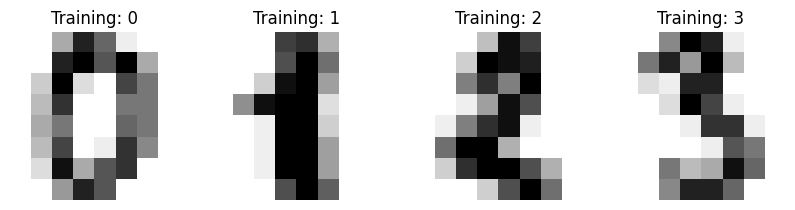

In [2]:
digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

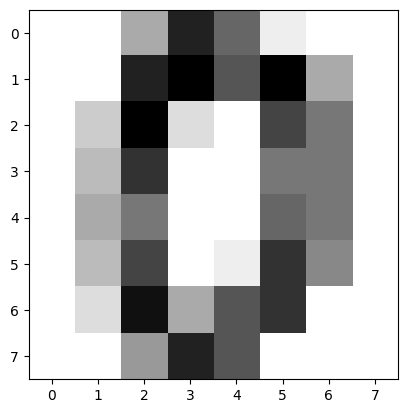

In [9]:
image = np.reshape(digits.data[0], (8, 8))
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [10]:
digits.target[0]

0

## Split de datos en train y test

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

## Entrenamiento del modelo

In [14]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluacion del modelo

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
predictions = logistic_reg.predict(x_test)
predictions[:5]

array([2, 8, 2, 6, 6])

In [19]:
cm = confusion_matrix(y_test, predictions)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

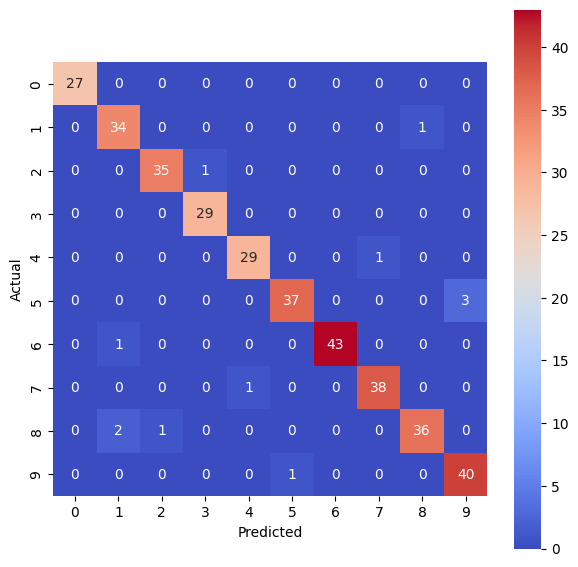

In [28]:
plt.figure(figsize=(7, 7))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='coolwarm', square=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')